In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [4]:
fringe_data = pd.read_csv('fringe_data_7_11.csv')
print(fringe_data)

        Record Length          10000   Points  -100.0000015E-3  \
0     Sample Interval  19.9999995E-6        s         -0.09998   
1       Trigger Point   5.00000044E3  Samples         -0.09996   
2                 NaN            NaN      NaN         -0.09994   
3                 NaN            NaN      NaN         -0.09992   
4                 NaN            NaN      NaN         -0.09990   
...               ...            ...      ...              ...   
9994              NaN            NaN      NaN          0.09990   
9995              NaN            NaN      NaN          0.09992   
9996              NaN            NaN      NaN          0.09994   
9997              NaN            NaN      NaN          0.09996   
9998              NaN            NaN      NaN          0.09998   

      548.000037670E-3  Unnamed: 5  Record Length.1        10000.1 Points.1  \
0                0.540         NaN  Sample Interval  19.9999995E-6        s   
1                0.532         NaN    Trigger Poi

In [14]:
# channel 2

time = fringe_data['-100.0000015E-3']
voltage = fringe_data['720.000028610E-3']

# channel 1

time_ch1 = fringe_data['-100.0000015E-3']
voltage_ch1 = fringe_data['548.000037670E-3']

In [34]:
print(np.mean(voltage))
print(np.min(voltage))
print(np.max(voltage))
print(np.min(time))
print(np.max(time))

1.4163777318478852
0.440000027418
2.3200002
-0.099980004132
0.099979996681


2       0.84
7       0.72
10      0.76
13      0.76
17      0.72
        ... 
9983    0.76
9986    0.76
9990    0.80
9992    0.72
9994    0.72
Name: 720.000028610E-3, Length: 2689, dtype: float64


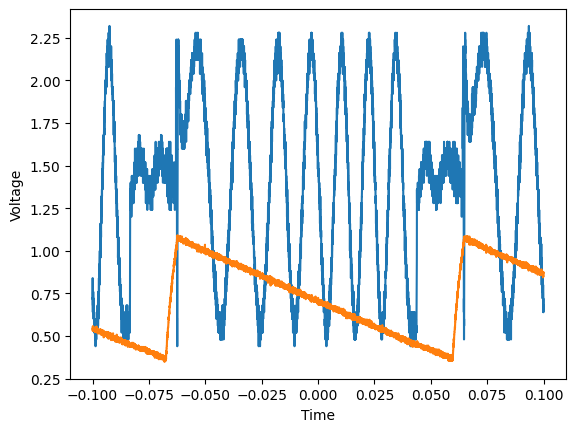

In [31]:
plt.plot(time, voltage)
plt.plot(time_ch1, voltage_ch1)

plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()


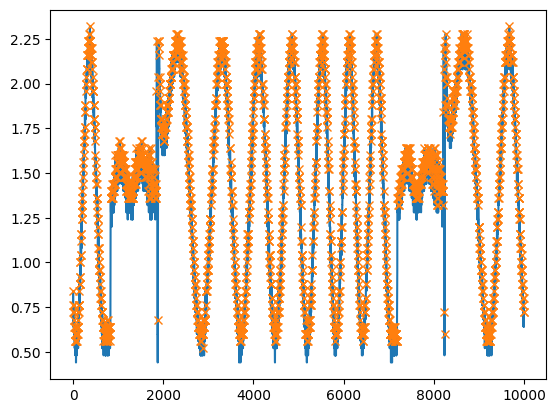

In [37]:
from scipy.signal import peak_prominences

peaks, _ = find_peaks(voltage)
peak_voltages = voltage[peaks]


prominences = peak_prominences(voltage, peaks)[0]
contour_heights = voltage[peaks] - prominences

plt.plot(voltage)
plt.plot(peaks, voltage[peaks], 'x')
plt.show()

In [74]:
peaks, peak_properties = find_peaks(voltage, prominence=1.7) # find local peaks, only peaks with minimum prominence of 0.5V located. obtain indices through peaks and prominences through peak_properties
peak_prominences = peak_properties['prominences'] # obtain prominences from dict
print("peak prominences =", peak_prominences)

inverted_voltage = -voltage
troughs, trough_properties = find_peaks(inverted_voltage, prominence=1.2)
trough_prominences = trough_properties['prominences']
print("trough prominences =", trough_prominences)

peak prominences = [1.88000017 1.76000018 1.84000017 1.84000017 1.84000017 1.84000017
 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018
 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018
 1.76000018 1.76000018 1.84000017 1.84000017 1.84000017 1.84000017
 1.84000017 1.84000017 1.84000017 1.84000017 1.84000017 1.84000017
 1.84000017 1.84000017 1.84000017 1.71999998 1.80000018 1.80000018
 1.80000018 1.80000018 1.80000018 1.80000018 1.80000018 1.80000018
 1.80000018]
trough prominences = [1.76000018 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018
 1.76000018 1.76000018 1.76000018 1.88000017 1.76000018 1.76000018
 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018 1.76000018
 1.76000018 1.88000017 1.88000017 1.88000017 1.88000017 1.80000018
 1.80000018 1.80000018 1.80000018 1.80000018 1.80000018 1.80000018
 1.88000017 1.88000017 1.71999998 1.80000018 1.80000018 1.80000018
 1.80000018 1.80000018 1.80000018 1.80000018 1.80000018]


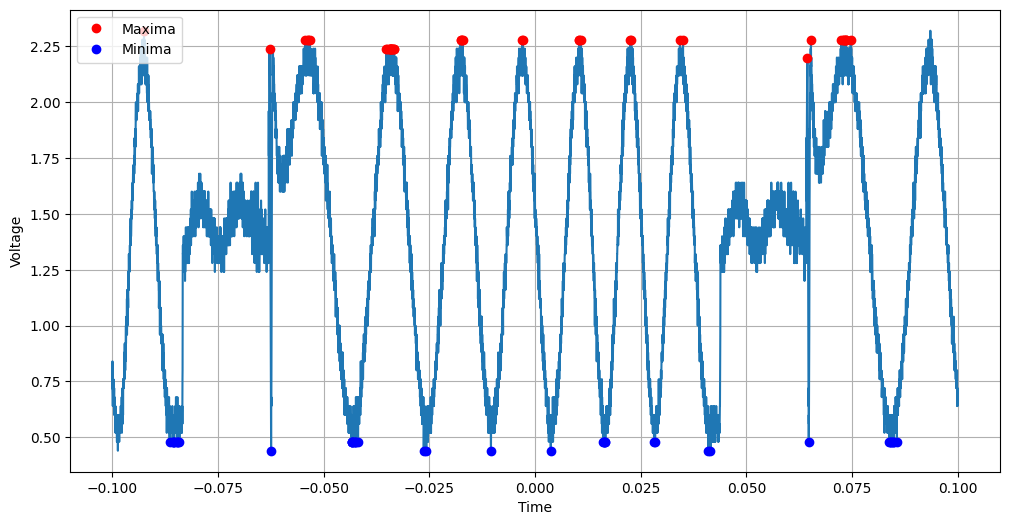

375    -0.09248
1859   -0.06280
2284   -0.05430
2313   -0.05372
2315   -0.05368
2336   -0.05326
3242   -0.03514
3249   -0.03500
3273   -0.03452
3279   -0.03440
3284   -0.03430
3288   -0.03422
3291   -0.03416
3295   -0.03408
3300   -0.03398
3306   -0.03386
3312   -0.03374
3317   -0.03364
3331   -0.03336
3333   -0.03332
4118   -0.01762
4129   -0.01740
4136   -0.01726
4144   -0.01710
4850   -0.00298
4856   -0.00286
5519    0.01040
5521    0.01044
5538    0.01078
6128    0.02258
6137    0.02276
6713    0.03428
6749    0.03500
8219    0.06440
8262    0.06526
8618    0.07238
8646    0.07294
8648    0.07298
8657    0.07316
8671    0.07344
8673    0.07348
8675    0.07352
8732    0.07466
Name: -100.0000015E-3, dtype: float64


In [81]:
plt.figure(figsize=(12, 6))
plt.plot(time, voltage)
plt.plot(time[peaks], voltage[peaks], 'o', label='Maxima', color='red')
plt.plot(time[troughs], voltage[troughs], 'o', label='Minima', color='blue')

plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.show()

#print("maxima =", voltage[peaks])
#print("minima =", voltage[troughs])

print(time[peaks])


In [82]:
# time difference between peaks
time_differences = np.diff(time[peaks])
print(time_differences)


[2.96799988e-02 8.50000233e-03 5.80001620e-04 3.99984400e-05
 4.20000400e-04 1.81199983e-02 1.40000140e-04 4.79999930e-04
 1.19999050e-04 1.00001690e-04 8.00006100e-05 5.99995200e-05
 8.00006100e-05 9.99979700e-05 1.20002780e-04 1.19999050e-04
 9.99979700e-05 2.80000260e-04 4.00021700e-05 1.56999994e-02
 2.19998900e-04 1.40000200e-04 1.59999300e-04 1.41200007e-02
 1.19999980e-04 1.32599993e-02 4.00003000e-05 3.39999800e-04
 1.18000004e-02 1.79998570e-04 1.15200002e-02 7.20001750e-04
 2.93999985e-02 8.59998166e-04 7.11999834e-03 5.60000539e-04
 4.00021670e-05 1.79998577e-04 2.80000269e-04 4.00021670e-05
 4.00021680e-05 1.13999844e-03]
